0.9961798825875677


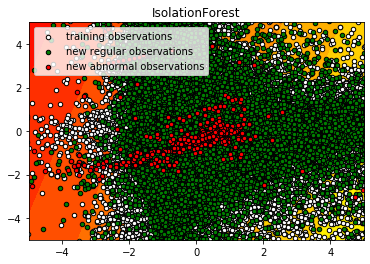

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('creditcard.csv')
# df= df.sample(frac = 0.01, random_state=1)
X = df.drop(['Class'], axis = 1)
X = X.drop(['Time'], axis = 1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
x_outliers = X[y == 1]

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_outliers = scaler.fit_transform(x_outliers)

pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
x_outliers = pca.fit_transform(x_outliers)

outlier_fraction = len(y_train[y_train == 1]) / len(y_train[y_train == 0])

if_clf = IsolationForest(n_estimators = 100, max_samples = len(x_train), contamination = outlier_fraction, random_state = 42, verbose = 0)
if_clf.fit(x_train,y_train)

y_pred = if_clf.predict(x_test)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

print(accuracy_score(y_test, y_pred))

xx, yy = np.meshgrid(np.linspace(-5, 5, 2), np.linspace(-5, 5, 2))
Z = if_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap='autumn')

b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

